# 1. Análisis Exploratorio Inicial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Variables categóricas
df.dtypes[df.dtypes.array=='O']

Date            object
Location        object
WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

In [7]:
# Variables numéricas
df.dtypes[df.dtypes.array!='O']

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
dtype: object

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
# Variables de entrada
df.drop('RainTomorrow', axis=1, inplace=False).columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [10]:
# Variables de salida
df['RainTomorrow'].name

'RainTomorrow'

## Análisis Variables de Entrada

A continuación, se van a analizar las variables de entrada, haciendo foco en las distribuciones para el caso de las numéricas y la cardinalidad y representación para las categóricas. En ámbos casos se analizarán en conjunto las variables que se creen de algún modo relacionadas, por el conocimiento a priori del problema de estudio.

### Variables Numéricas

In [11]:
def plot_boxhist(df, features, sharex, sharey, figsize):
    
    nrows = 2
    ncols = len(features)
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=sharex, sharey=sharey, figsize=figsize)
    fig.suptitle("Distribuciones de {}".format(', '.join(features)), fontsize=32)

    for i, col in enumerate(features):
        ax[0, i].boxplot(df.loc[df[col].isna()==False, col])
        ax[0, i].set_title("Boxplot {}".format(col))
        ax[1, i].hist(df.loc[df[col].isna()==False, col])
        ax[1, i].set_title("Histograma {}".format(col))
    
    plt.show()

#### Análisis de Temperaturas

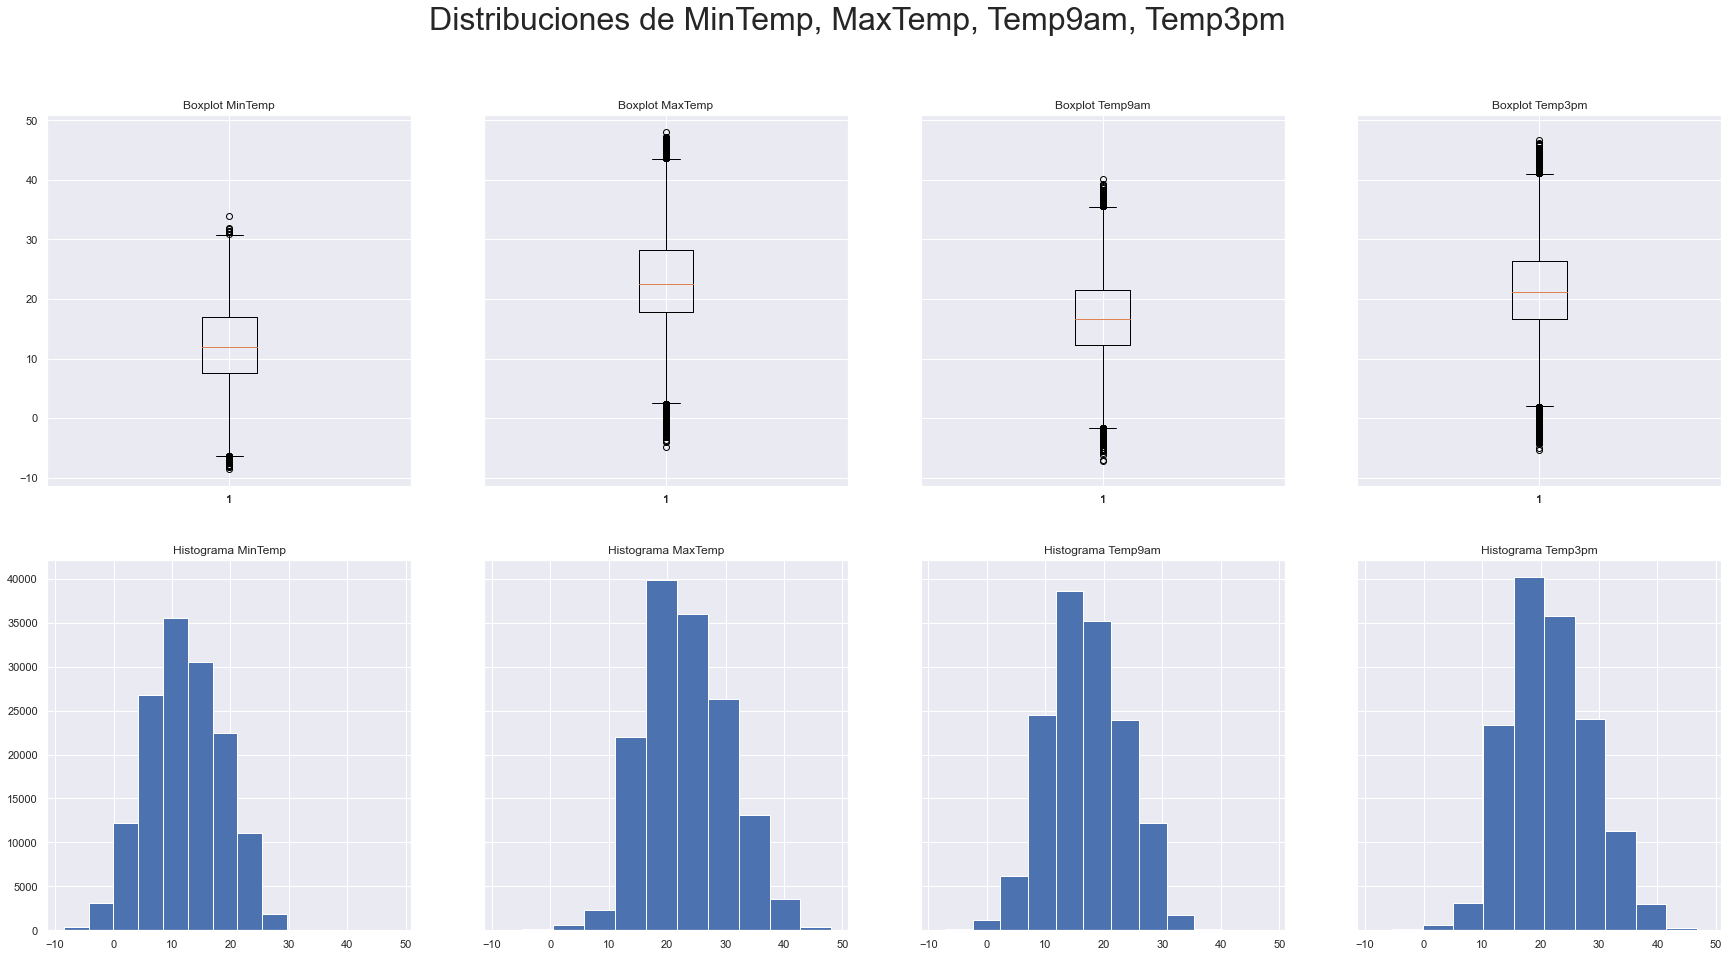

In [12]:
plot_boxhist(df, ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'], sharex="row", sharey="row", figsize=(30, 15))

A partir de los histogramas, se observa que las temperaturas máximas, mínimas, a las 9AM y 3PM tienen una distribución dentro de todo normal, por lo que no se contemplará realizar transformaciones en ese sentido. Se observa también un relación de magnitud entre las temperaturas mínimas y las de 9AM y las temperaturas máximas y las de 3 PM. Ésto nos induce a analizar la correlación entre estas variables, y de ser una correlación muy alta, se puede eliminar alguna de ellas.

#### Análisis de Nubosidad y Luz Solar

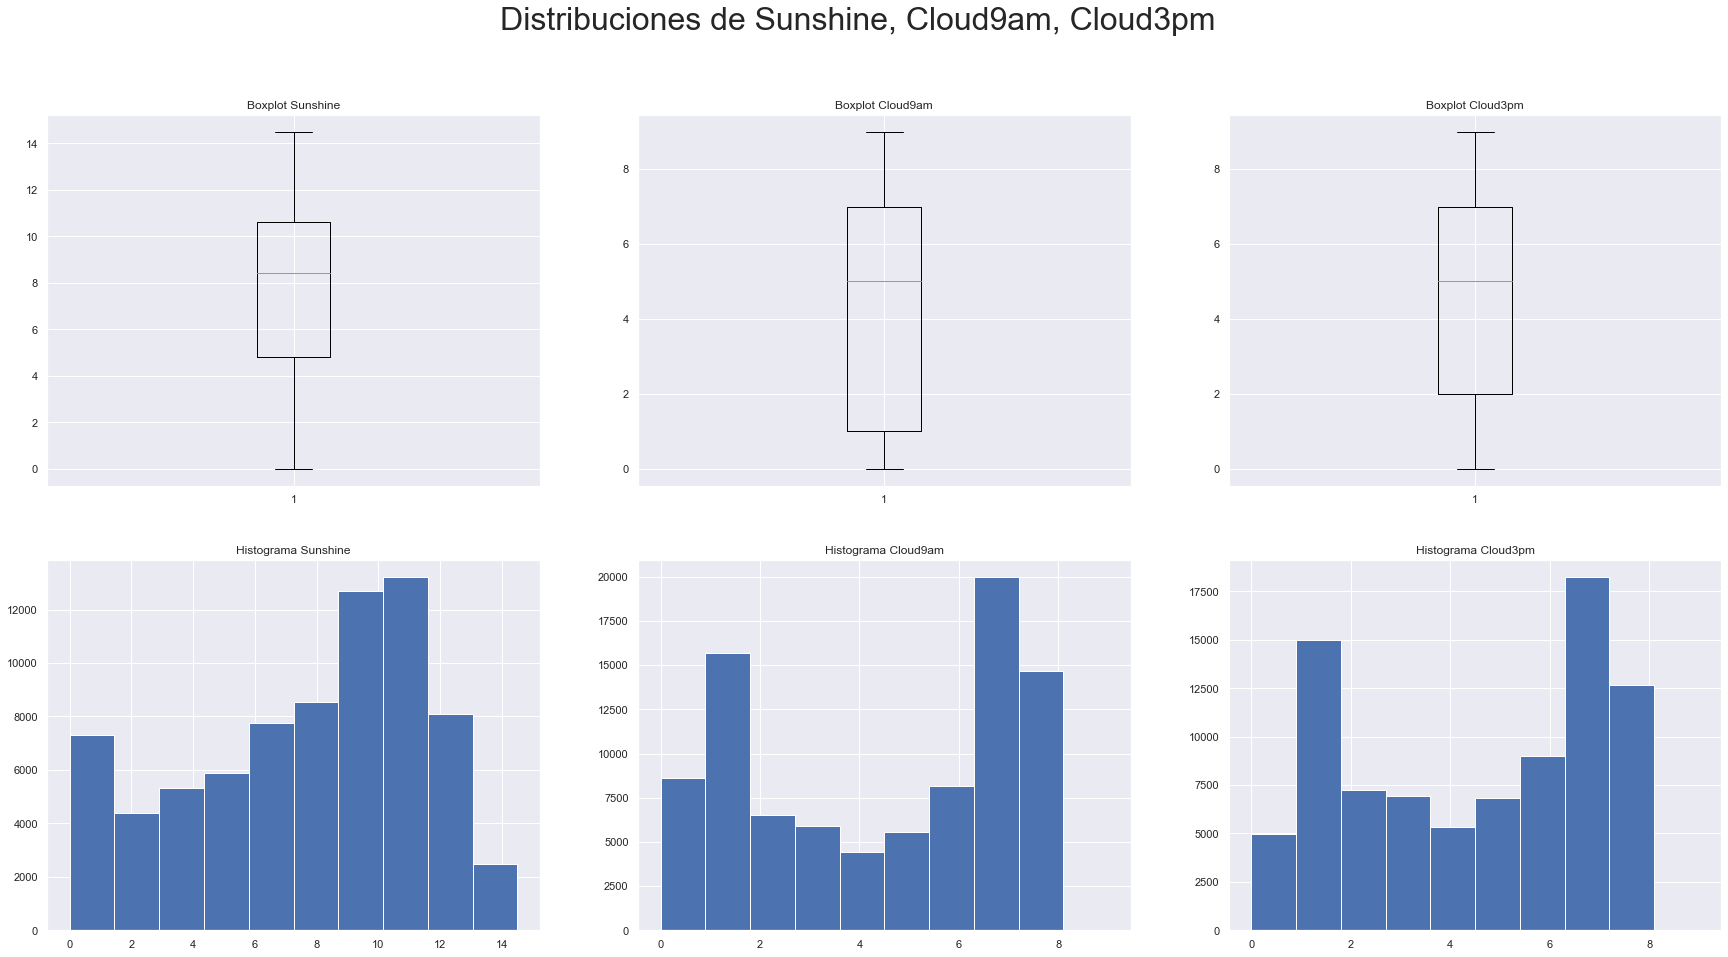

In [13]:
plot_boxhist(df, ['Sunshine', 'Cloud9am', 'Cloud3pm'], sharex="none", sharey="none", figsize=(30, 15))

Se puede observar en los histogramas y boxplots anteriores de nubosidad que la distribución para los valores de 9AM y 3PM son bastantes similares y aparentemente bimodales con una gran concentración de datos para nubosidades bajas y altas y pocos casos con nubosidad media. En el caso de la distribución de luz solar, se evidencia un corrimiento hacia la derecha. Intuyendo una relación entre nubosidad y luz solar, se buscará graficar la mísma.

In [14]:
# Armamos una máscara para quitar los nans de las columnas a analizar (lo óptimo sería armar dos máscaras, 
# pero por extensión se condensa en una única)

mask_nans = (df['Sunshine'].isna()==False) & (df['Cloud3pm'].isna()==False) & (df['Cloud9am'].isna()==False)

In [15]:
# Armamos un nuevo dataframe agrupado por luz solar con las medias de nubosidad

df_sunshine_cloud = df.loc[mask_nans, ['Sunshine', 'Cloud3pm', 'Cloud9am']].groupby('Sunshine').mean().reset_index()

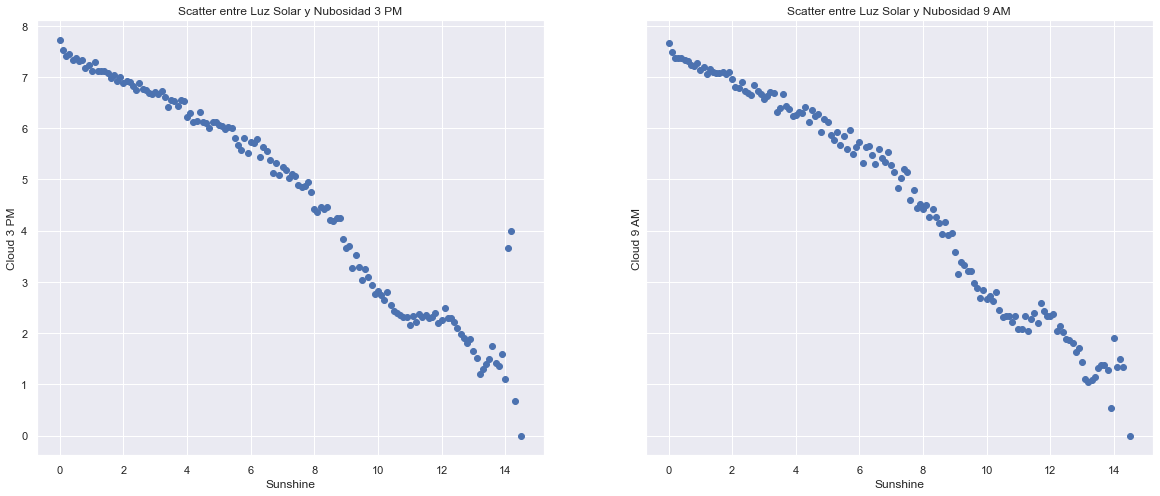

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 8))
plt.title("Scatter plot entre Luz Solar y Nubosidad")

ax[0].scatter(df_sunshine_cloud['Sunshine'], df_sunshine_cloud['Cloud3pm'])
ax[0].set_title("Scatter entre Luz Solar y Nubosidad 3 PM")
ax[0].set_xlabel("Sunshine")
ax[0].set_ylabel("Cloud 3 PM")

ax[1].scatter(df_sunshine_cloud['Sunshine'], df_sunshine_cloud['Cloud9am'])
ax[1].set_title("Scatter entre Luz Solar y Nubosidad 9 AM")
ax[1].set_xlabel("Sunshine")
ax[1].set_ylabel("Cloud 9 AM")

plt.show()

Como se observa en los gráficos anteriores, existe una fuerte correlación entre luz solar y las medias de nubosidad (negativa), por lo que se podría evaluar utilizar la relación para la imputación de valores faltantes y/o eventualmente descartar algunas de las features para simplificar el modelo. Por otro lado, no se observan grandes diferencias en ésta relación entre la nubosidad a las 9am y 3 pm.

#### Análisis de Velocidades de Viento

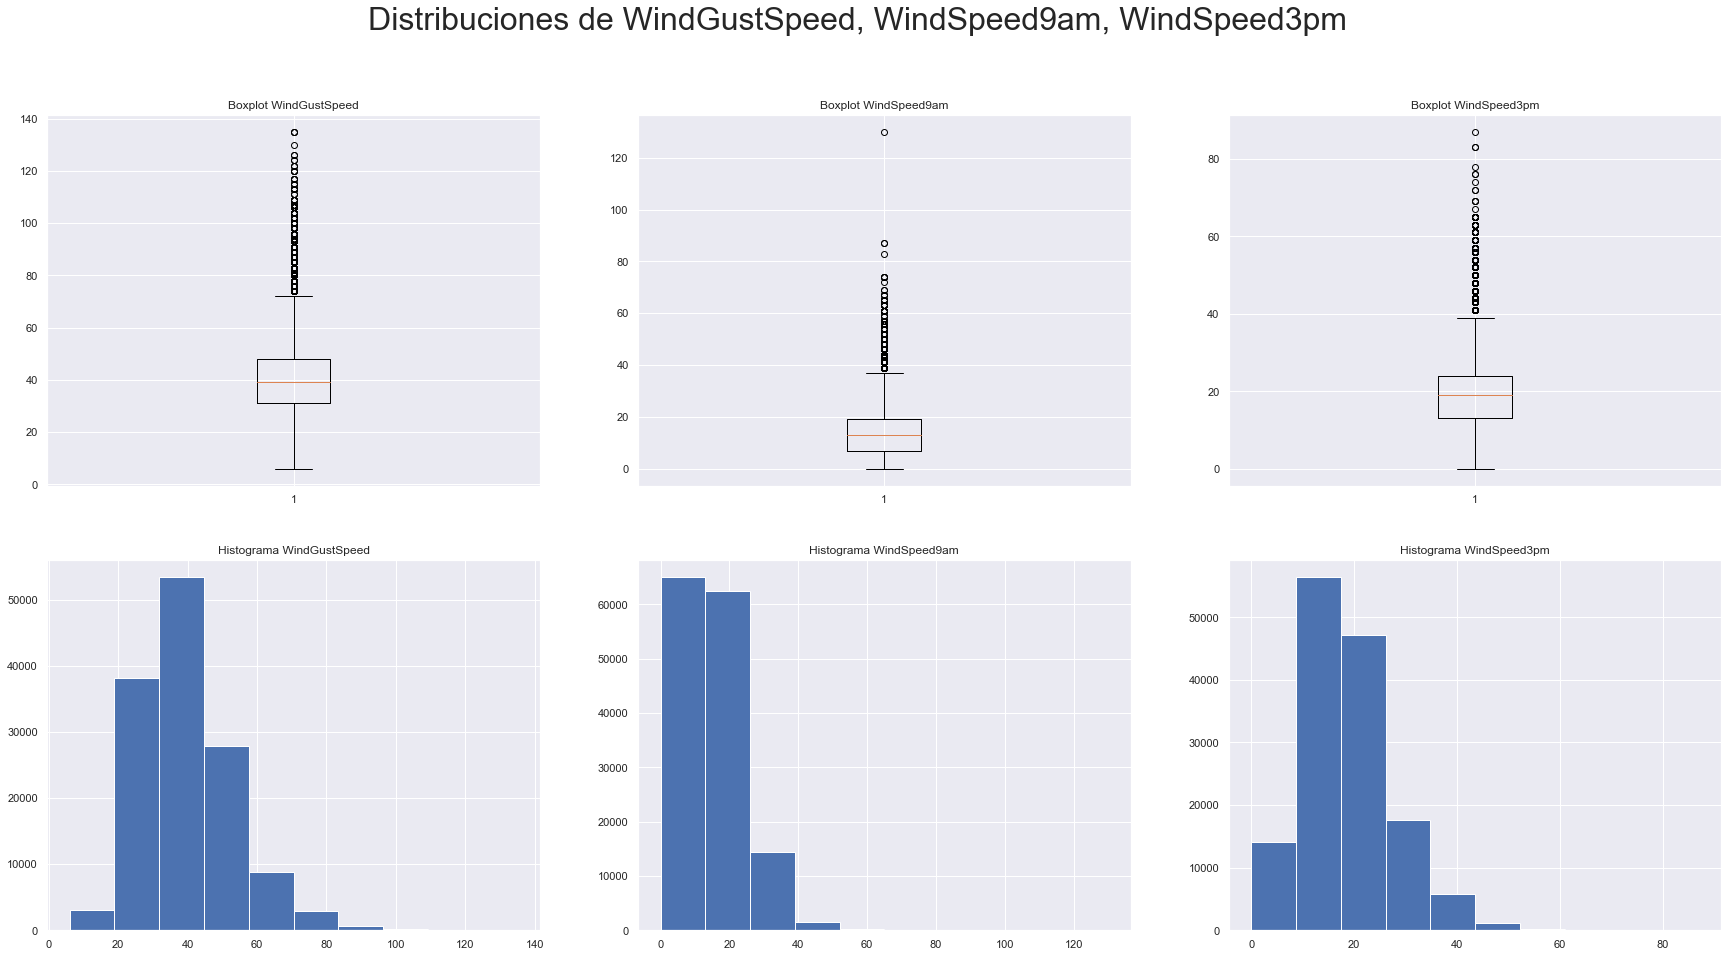

In [17]:
plot_boxhist(df, ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'], sharex="none", sharey="none", figsize=(30, 15))

Como es esperable, la media de los datos de ráfaga de viento son superiores a las del viento de 9 am y 3 pm. Por otro lado, el viento a las 3 PM pareciera mostrar velocidades más altas en promedio que el de la mañana. La distribución de los datos de velocidad de viento tienen un leve corrimiento hacia la izquierda y en todos los casos se observan bastantes outliers (considerados IQR) con velocidades de viento altas.

#### Análisis de Precipitación, Evaporación y Humedad

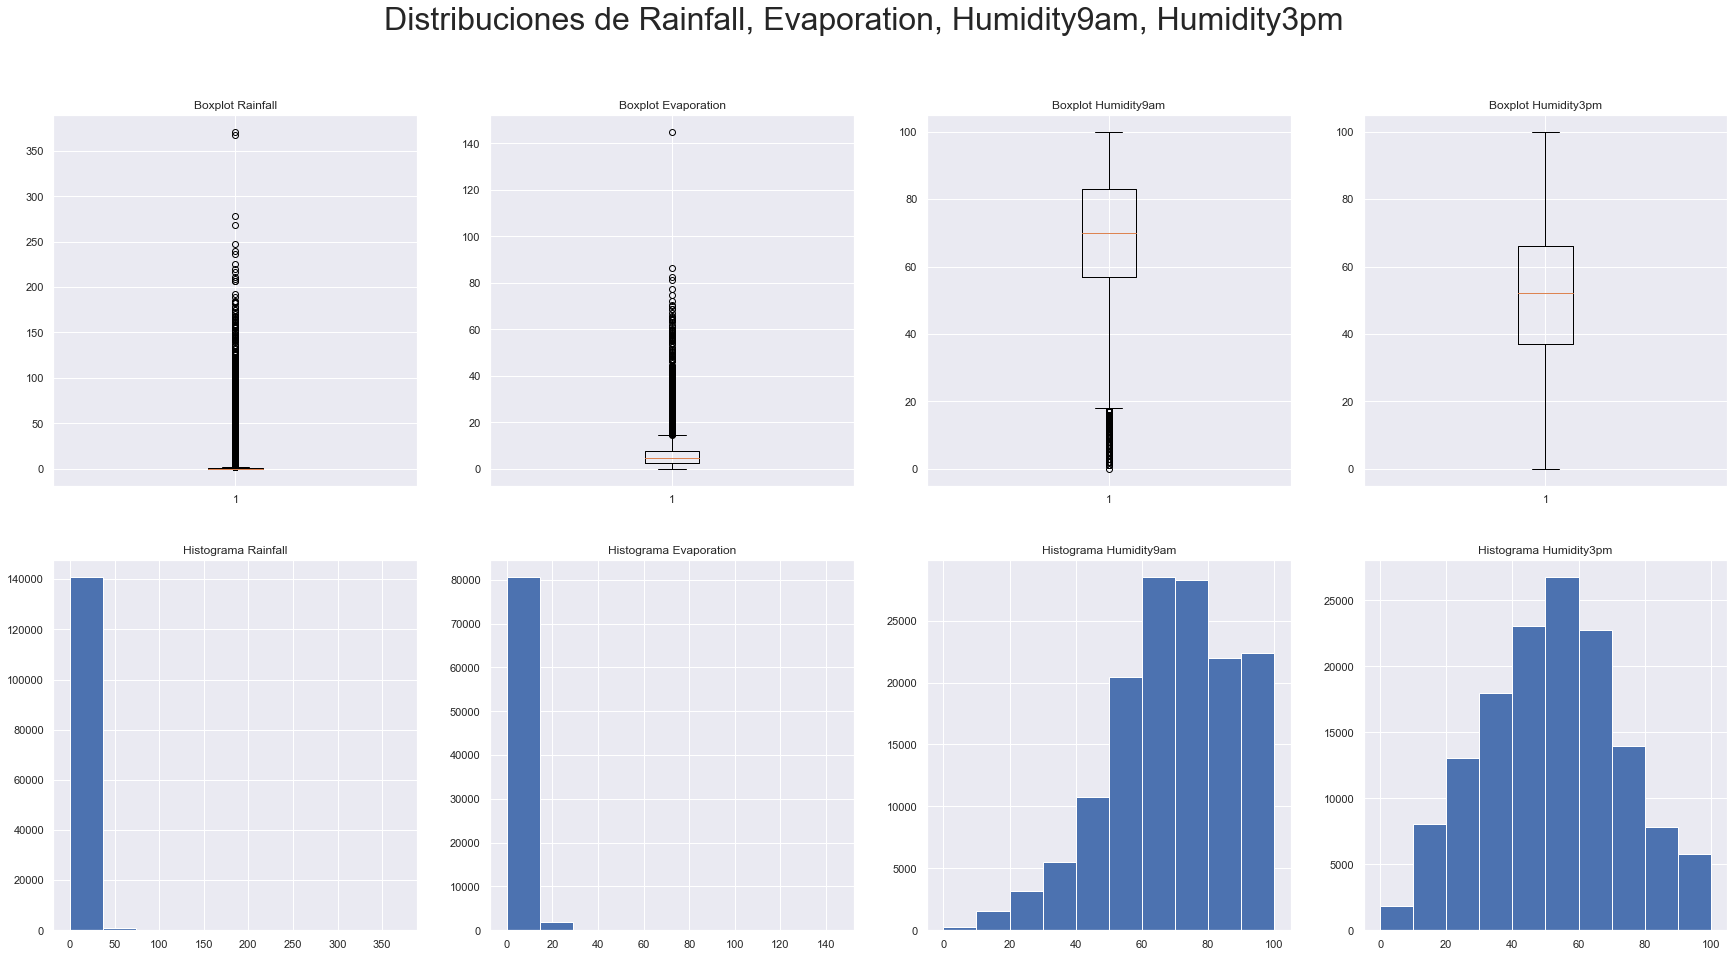

In [18]:
plot_boxhist(df, ['Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm'], sharex="none", sharey="none", figsize=(30, 15))

De los boxplots e histogramas de Rainfall y Evaporation, se deduce que los datos están mayoritariamente concentrados en un rango estrecho determinado de la variable y el resto, si lo analizamos por IQR, se considerarían outliers. Sería interesante ver la relación de esos outliers con la variable de salida. Vemos que la media de humedad es mayor a la mañana que al medioda (probablemente relacionado con el rocío), lo cual se evidencia también en el corrimiento hacia la derecha de la distribución de humedad a las 9 AM. Nuevamente, intuyendo una relación entre humedad y evaporación y precipitación, se realizará un análisis más detallado.

In [19]:
# Armamos una máscara para quitar los nans de las columnas a analizar. Nuevamente,
# lo óptimo sería armar dos máscaras, pero por extensión se condensa en una única.
# Tomamos como referencia la humedad a las 3 PM que aparenta una distribución normal.

mask_nans = (df['Rainfall'].isna()==False) & (df['Humidity3pm'].isna()==False) & (df['Evaporation'].isna()==False)

df_hum_rainfall = df.loc[mask_nans, ['Humidity3pm', 'Rainfall', 'Evaporation']].groupby('Humidity3pm').mean().reset_index()

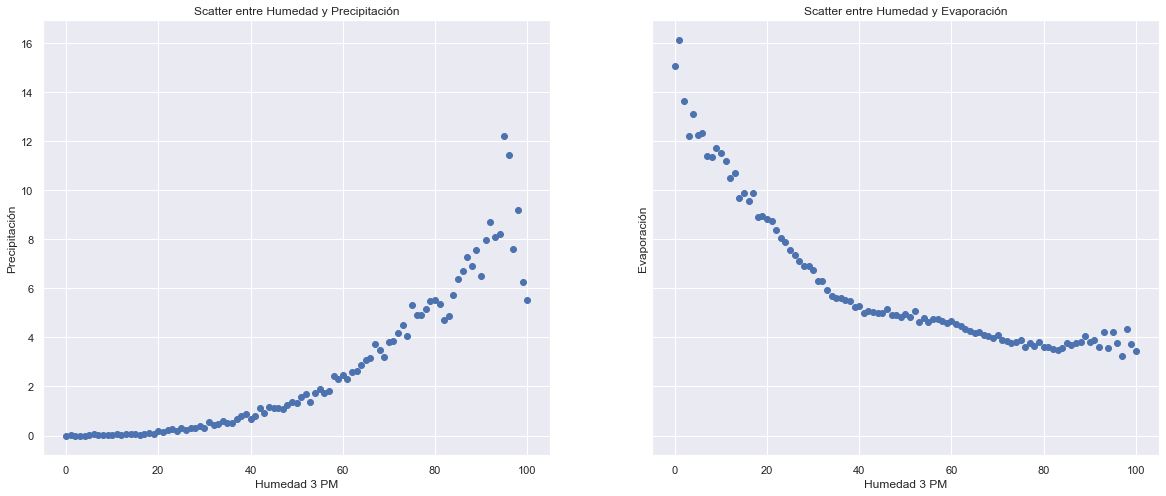

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 8))
plt.title("Scatter plot entre Humedad, Precipitación y Evaporación")

ax[0].scatter(df_hum_rainfall['Humidity3pm'], df_hum_rainfall['Rainfall'])
ax[0].set_title("Scatter entre Humedad y Precipitación")
ax[0].set_xlabel("Humedad 3 PM")
ax[0].set_ylabel("Precipitación")

ax[1].scatter(df_hum_rainfall['Humidity3pm'], df_hum_rainfall['Evaporation'])
ax[1].set_title("Scatter entre Humedad y Evaporación")
ax[1].set_xlabel("Humedad 3 PM")
ax[1].set_ylabel("Evaporación")

plt.show()

Se puede observar, en los gráficos de arriba, que existe un relación no lineal entre la humedad y las medias de precipitación y evaporación. En ámbos casos es monotona la relación, creciente y decreciente respectivamente.

#### Análisis de Presión

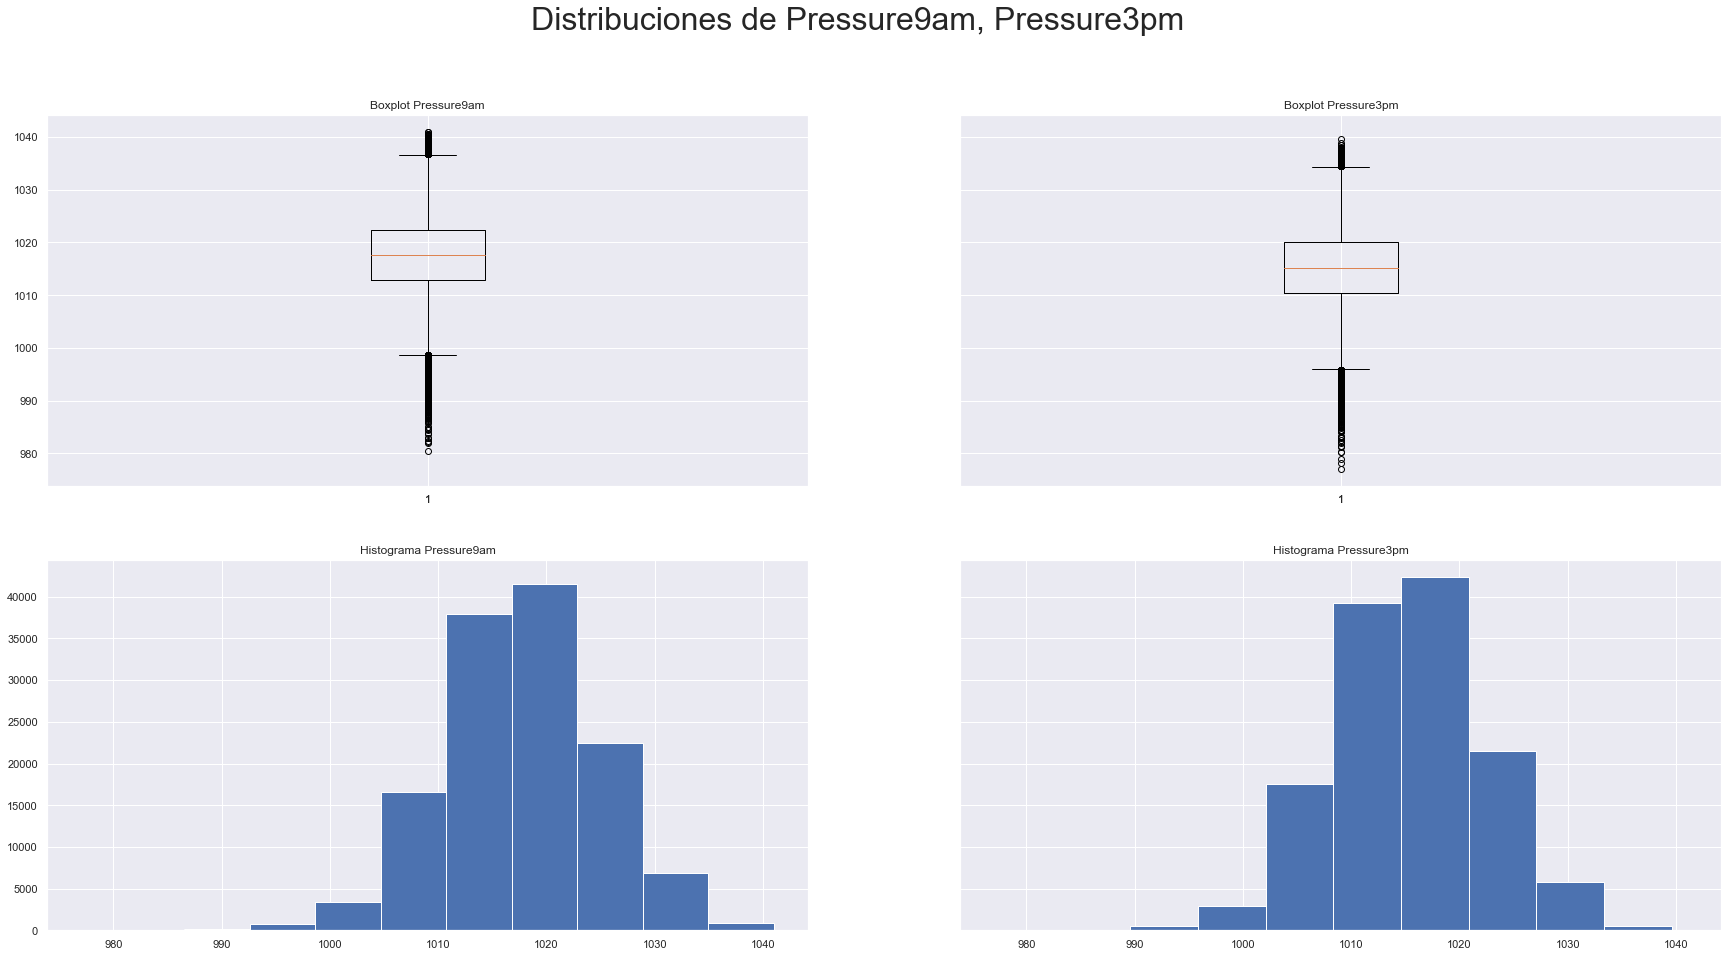

In [21]:
plot_boxhist(df, ['Pressure9am', 'Pressure3pm'], sharex="row", sharey="row", figsize=(30, 15))

Se puede observar que las distribuciones para las presiones a las 9AM y 3PM son similares. La presión del ambiente, de por sí, no suele tener alta variabilidad (como se observa en los boxplot), por lo que sería importante estudiar la relación de los outliers de presión con la variable de salida.

Por otro lado, es conocida la relación entre la presión, humedad y temperatura para éstos casos. La relación no se estudia por cuestiones de extensión pero se deja su análisis para trabajos futuros.

### Variables Categóricas

#### Rain Today

In [22]:
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

Vemos que la variable tiene dos clases. A continuación, graficamos la representatividad de cada clase, donde se nota que la variable está imbalanceada y hay mayor representitividad de muestras donde no llovió ese día.

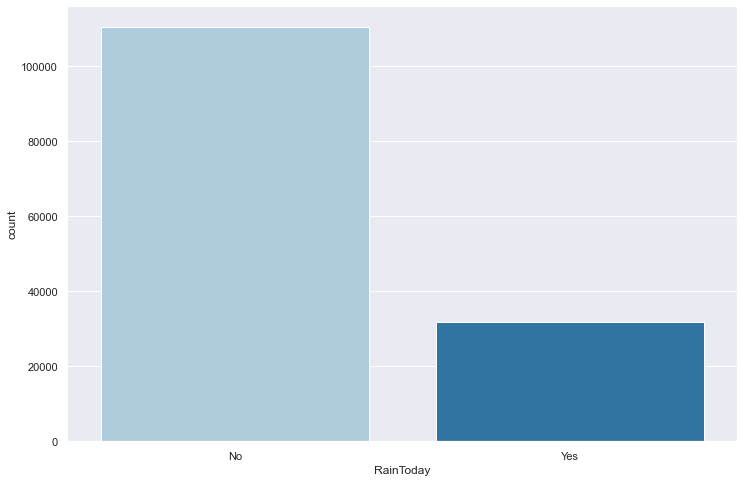

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.countplot(df['RainToday'], ax = ax, palette='Paired')
plt.show()

#### Dirección del Viento

In [24]:
print("Valore únicos de WindFustDir: ", df['WindGustDir'].unique()," Cantidad: ", df['WindGustDir'].unique().shape[0],  "\n")
print("Valore únicos de WindDir9am: ", df['WindDir9am'].unique(), " Cantidad: ", df['WindDir9am'].unique().shape[0], "\n")
print("Valore únicos de WindDir3pm: ", df['WindDir3pm'].unique(), " Cantidad: ", df['WindDir3pm'].unique().shape[0], "\n")

Valore únicos de WindFustDir:  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']  Cantidad:  17 

Valore únicos de WindDir9am:  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']  Cantidad:  17 

Valore únicos de WindDir3pm:  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']  Cantidad:  17 



Las tres variables tienen 16 categorías (17 con los nans), y son las mísmas para las tres. A continuación, estudiamos la representatividad y su variación en las tres variables.

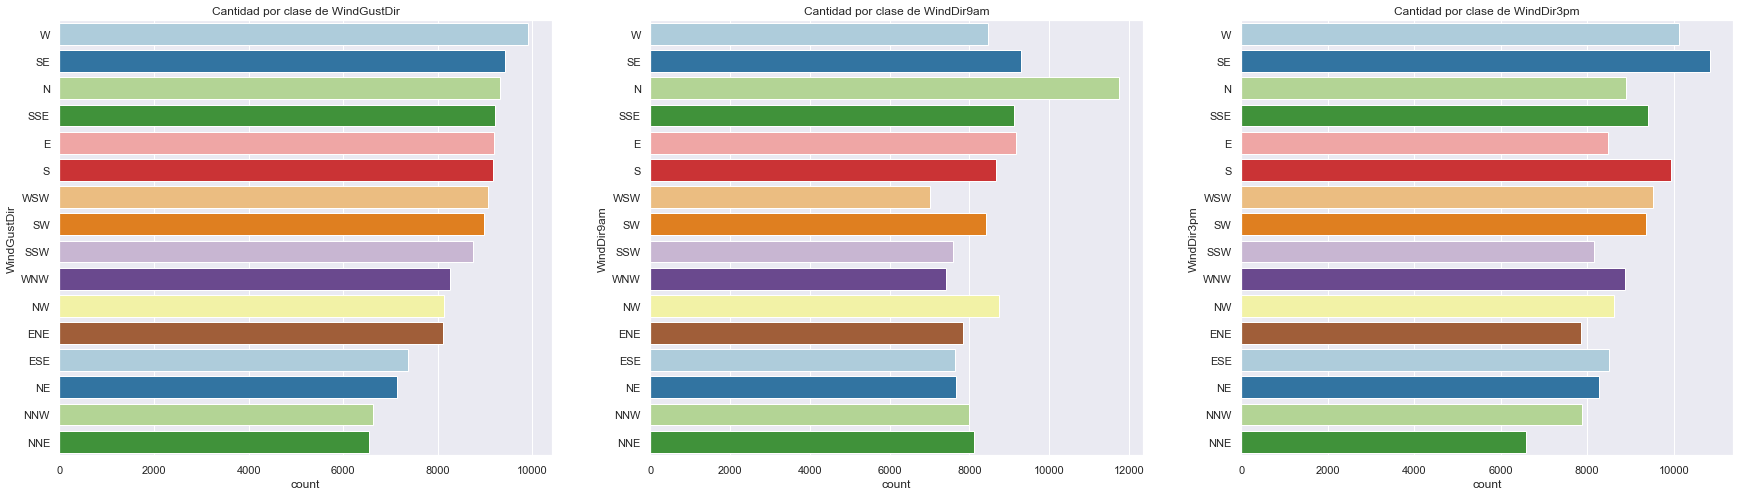

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

sns.countplot(data=df, y='WindGustDir', ax = ax[0], palette='Paired', 
              order=df['WindGustDir'].value_counts().index)

sns.countplot(data=df, y='WindDir9am', ax = ax[1], palette='Paired', 
              order=df['WindGustDir'].value_counts().index)

sns.countplot(data=df, y='WindDir3pm', ax = ax[2], palette='Paired', 
              order=df['WindGustDir'].value_counts().index)

ax[0].set_title('Cantidad por clase de WindGustDir')
ax[1].set_title('Cantidad por clase de WindDir9am')
ax[2].set_title('Cantidad por clase de WindDir3pm')

plt.show()

#### Ubicación

In [26]:
# Clases
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [27]:
# Cardinalidad
df['Location'].unique().shape[0]

49

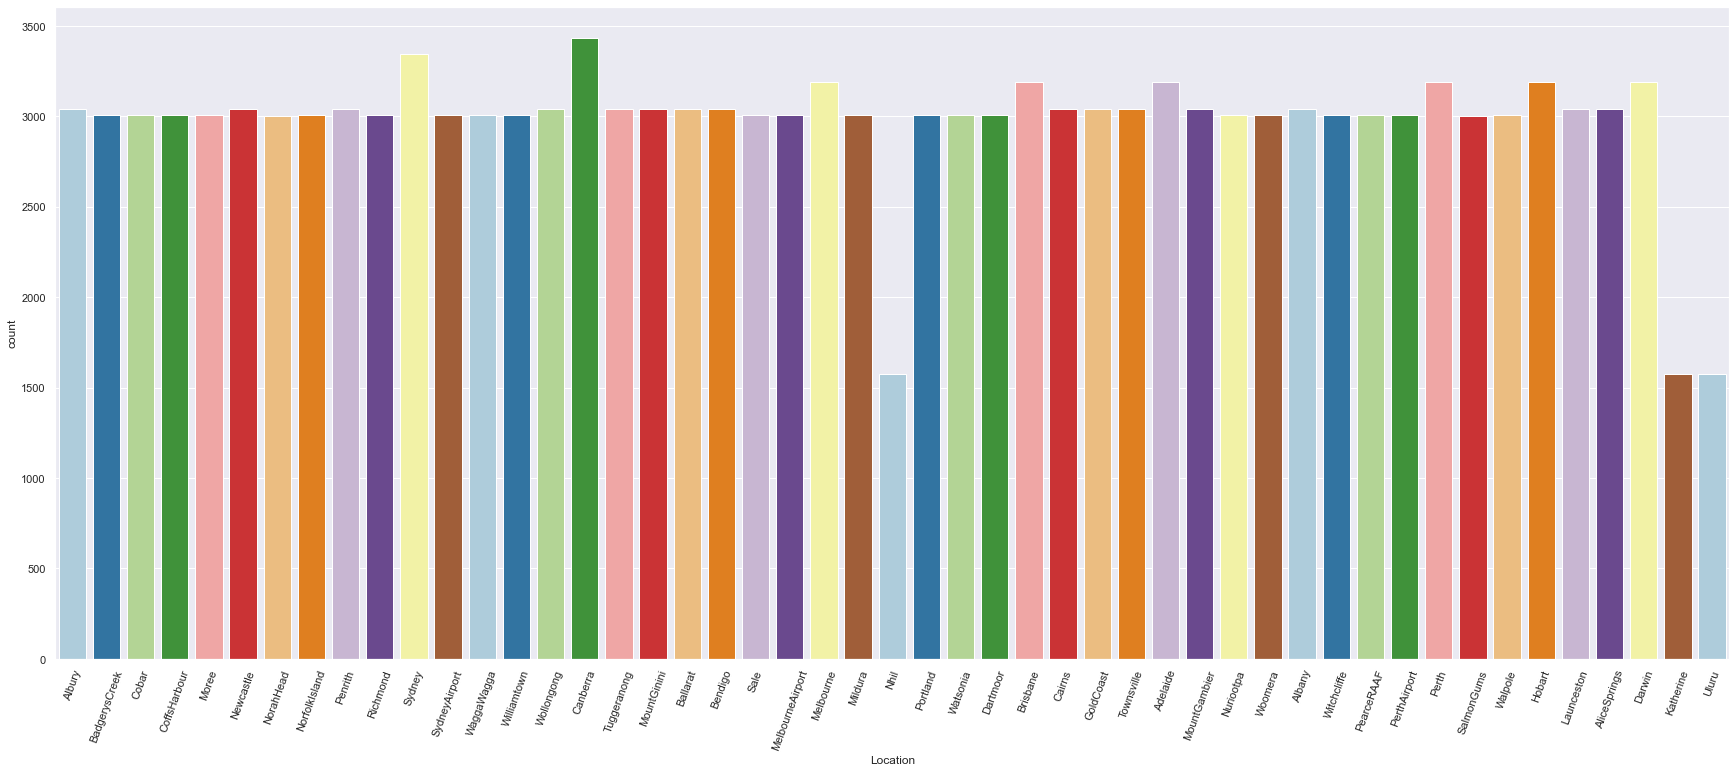

In [28]:
# Representatividad

fig, ax = plt.subplots(1, 1, figsize=(30, 12))

sns.countplot(df['Location'], ax = ax, palette='Paired')
plt.xticks(rotation=70)
plt.show()

In [29]:
df['Location'].value_counts().sort_values().head()

Katherine     1578
Nhil          1578
Uluru         1578
SalmonGums    3001
NorahHead     3004
Name: Location, dtype: int64

En general, vemos una representación similar para cada una de las 49 ubicaciones, exceptuando los casos de Katherine, Uluru y Nhil que tienen menor cantidad de muestras. 

Para poder realizar un mejor análisis de la variable, sería importante encontrar una forma de representación más informativa como las coordenadas geográficas. Para ello, se realizarán una serie de transformaciones que nos permitirán, entre otras cosas, visualizar la relación geográfica de algunas variables y, más adelante, codificar la feature y crear nuevas a partir de ella.

In [30]:
import re
from functools import partial
from geopy.geocoders import Nominatim

Vamos a extraer todos los valores únicos de ubicación y, con geopy y la API de Nominatim, vamos a extraer las coordenadas para cada uno de ellos. Para obtener buenos resultados, se debe preprocesar la variable antes de llamar a la API:

In [31]:
# Obtenemos los valores únicos de ubicación
location_values = df['Location'].unique()

In [32]:
location_values

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Algo que se puede observar del listado de ubicaciones, es que han adoptado, para los nombre compuestos, escribirlos de corrido utilizando separación por mayúsculas. Otro aspecto importante a tener en cuenta, es que muchas de éstas ubicaciones, pueden corresponder a varios países. Es necesario indicar a la API, que busque las coordenadas para Australia. Para ello, agregamos a la ubicación el país.

In [33]:
location_values_parsed = [' '.join(re.findall('[A-Z][^A-Z]*', x)) + ', Australia' for x in location_values]

In [34]:
location_values_parsed[:6]

['Albury, Australia',
 'Badgerys Creek, Australia',
 'Cobar, Australia',
 'Coffs Harbour, Australia',
 'Moree, Australia',
 'Newcastle, Australia']

In [35]:
# Uso partial de functools para no tener que indicar los parámetros cada vez que llamamos la función.

geolocator = Nominatim(user_agent="ldc0295@gmail.com")
geocode = partial(geolocator.geocode, language="es")

In [36]:
# Nos traemos el objeto location para cada una de las ubicaciones.

location_geopy = [geocode(x, timeout=10) for x in location_values_parsed]

In [37]:
# Para cada ubicación buscamos la latitud, longitud

latitude = [x.latitude for x in location_geopy]
longitude = [x.longitude for x in location_geopy]

In [38]:
data_coord = [location_values, latitude, longitude]

In [39]:
df_coordinates = pd.DataFrame(np.array(data_coord).T, columns=['Location', 'Latitude', 'Longitude'])

In [40]:
df_coordinates.head()

,Location,Latitude,Longitude
0,Albury,-36.0805,146.916
1,BadgerysCreek,-33.8817,150.744
2,Cobar,-31.4983,145.834
3,CoffsHarbour,-30.2962,153.114
4,Moree,-29.4617,149.841


In [41]:
# Guardamos el dataset con las coordenadas para reutilizarlo luego y no tener que volver a llamar a la API

df_coordinates.to_csv("weatherAUS_coord.csv")

In [42]:
df_coordinates = pd.read_csv("weatherAUS_coord.csv")

In [43]:
df_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49 non-null     int64  
 1   Location    49 non-null     object 
 2   Latitude    49 non-null     float64
 3   Longitude   49 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [44]:
df_coordinates.drop('Unnamed: 0', axis=1, inplace=True)

In [45]:
df_coordinates.describe()

,Latitude,Longitude
count,49.000000,49.000000
mean,-32.250108,142.454673
std,6.492559,11.592549
min,-42.882509,115.100477
25%,-35.529720,138.993901
50%,-33.949894,145.772185
75%,-30.296241,150.694168
max,-12.460440,167.958729


Vamos a graficar la distribución de las ubicaciones para ver cómo podemos codificarlas luego y que relaciones pueden haber con el resto de las variables. Para ello, utilizaremos Folium que tiene una interfaz sencilla para generar mapas.

In [46]:
import folium
from branca.element import Figure
from folium import plugins

In [47]:
# Determinamos el centro del mapa a partir de la media de las coordendas. Se podría tomar un enfoque más preciso.

center = [df_coordinates['Latitude'].mean(), df_coordinates['Longitude'].mean()]

In [48]:
center

[-32.25010824897959, 142.4546733081842]

In [49]:
# Creamos el mapa, indicando el centro, el nivel de zoom inicial y el tipo de capa.

map_aus = folium.Map( location=center, zoom_start=3, tiles="Stamen Terrain")

In [50]:
# Para cada ubicación creamos un marcador circular con los datos de latitud y longitud
result = df_coordinates.apply(lambda row: folium.CircleMarker(location=[row["Latitude"], 
                                                                        row["Longitude"]] ).add_to(map_aus), axis=1)

In [51]:
# Creamos una figura con branca (nos permite manipular la resolución de la imagen)

fig = Figure(width=800, height=600)
_ = fig.add_child(map_aus)

In [52]:
fig

A partir del mapa, se observa que la mayoría de las ubicaciones se encuentran en el área continental de Australia mientras que hay tres puntos que los podríamos definir como insulares. También se ve un potencial de clusterización de las ubicaciones y como hay ciertos puntos más alejados o cercanos al mar. Todas éstas características pueden ser nuevas features del dataset que podrían influir en la variable de salida. Se realizará un análisis acorde en la sección 3. A continuación, se estudiará brevemente la relación geográfica de algunas variables.

In [53]:
# Hacemos un merge de los dos dataframes usando Location como key.

df = df.merge(df_coordinates, how='left', left_on=['Location'], right_on=['Location'],
          suffixes=('', 'coord'))

In [54]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Latitude', 'Longitude'],
      dtype='object')

In [55]:
# Veamos la media de precipitaciones por ubicación:

loc_rainfall = df[['Latitude', 'Longitude', 'Rainfall']].groupby(['Latitude', 'Longitude']).mean().reset_index().values.tolist()

map_heatmap_rainfall = folium.Map(center, tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(loc_rainfall).add_to(map_heatmap_rainfall)

In [56]:
fig = Figure(width=800, height=600)
_ = fig.add_child(map_heatmap_rainfall)
fig

Se puede observar como en general en las zonas costeras hay en promedio mayor precipitación que en las ubicaciones más alejadas o que se encuentran en el centro del país. Es llamativa la ubicación insular del este que no presenta altos niveles de precipitación en comparación.

In [57]:
# Veamos la media de velocidad del viento por ubicación:

loc_wind = df[['Latitude', 'Longitude', 'WindSpeed3pm']].groupby(['Latitude', 'Longitude']).mean().reset_index().values.tolist()

map_heatmap_wind = folium.Map(center, tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(loc_wind).add_to(map_heatmap_wind)

In [58]:
fig_2 = Figure(width=800, height=600)
_ = fig_2.add_child(map_heatmap_wind)
fig_2

Nuevamente vemos el mísmo patrón que en el caso anterior, lo cual sugiere una fuerte relación entre éstas dos variables.

In [59]:
# Veamos la media de sunshine por ubicación:

loc_sunshine = df.loc[df['Sunshine'].isna()==False,['Latitude', 'Longitude', 'Sunshine']].groupby(['Latitude', 'Longitude']).mean().reset_index().values.tolist()

map_heatmap_sun = folium.Map(center, tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(loc_sunshine).add_to(map_heatmap_sun)

In [60]:
fig_3 = Figure(width=800, height=600)
_ = fig_3.add_child(map_heatmap_sun)
fig_3

In [61]:
# Por último, analizamos la media de humedad por ubicación:

loc_hum = df.loc[df['Humidity3pm'].isna()==False,['Latitude', 'Longitude', 'Humidity3pm']].groupby(['Latitude', 'Longitude']).mean().reset_index().values.tolist()

map_heatmap_hm = folium.Map(center, tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(loc_hum).add_to(map_heatmap_hm)

In [62]:
fig_4 = Figure(width=800, height=600)
_ = fig_4.add_child(map_heatmap_hm)
fig_4

Nuevamente vemos algunas coincidencias en las distribuciones. Por lo pronto, se tiene como indicio que la costa sureste y suroeste pueden llegar a presentar mayor proporción de lluvia que el resto. 

### Variables Compuestas

Se considera como variable compuest a la fecha de cada muestra. A continuación, se preprocesará la mísma, se analizará su impacto en algunas variables y se discutirá cómo se puede codificar.

In [63]:
# Convertimos la fecha a datetime y creamos nuevas columnas para el día, mes y año

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [64]:
df[['Date', 'Day', 'Month', 'Year']].dtypes

Date     datetime64[ns]
Day               int64
Month             int64
Year              int64
dtype: object

Una de las cosas a analizar es la estacionalidad de la variable de lluvia (RainToday), ya que es sabido que en cada ubicación existen temporadas de lluvia más intensas bastantes regulares y luego año a año pueden haber variaciones o incluso eventos aislados (huracanes, etc.). Para ello, debemos codificar primero la variable RainToday.

In [65]:
df['RainToday_enc'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else -1)

In [66]:
df['RainToday_enc'].describe()

count    145460.000000
mean          0.196748
std           0.450419
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainToday_enc, dtype: float64

A continuación, graficamos la proporción de días lluviosos por mes y por año para buscar alguna relación. **IMPORTANTE:** se está considerando que las muestras del dataset son representativas de la distribución real del proceso y que las diferencias en la proporción no se deben a un efecto de muestreo. Claramente ésto último puede haber ocurrido si se observan los resultados para el año 2007 (inicio del dataset) 

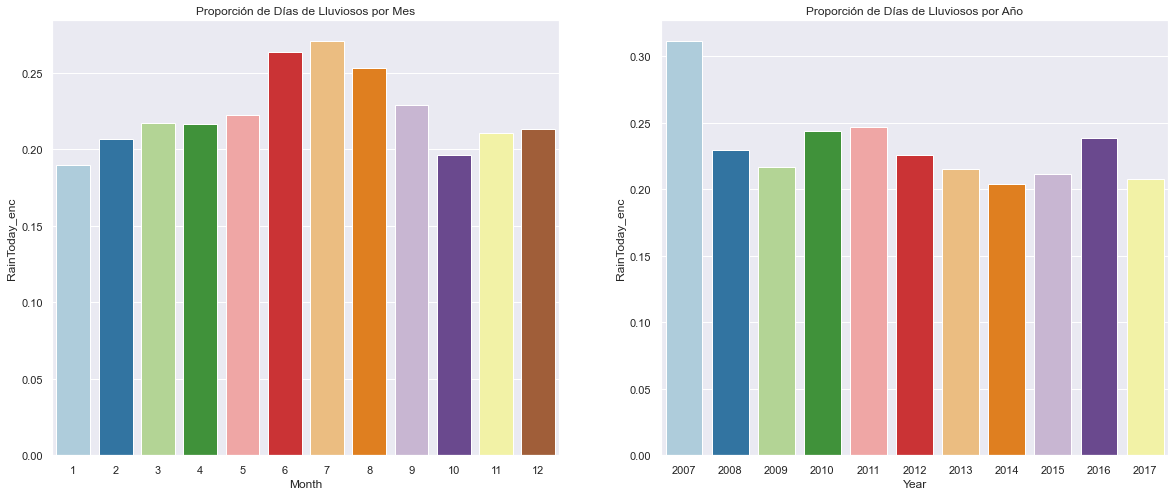

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

mask = df['RainToday_enc']>=0

sns.barplot(data=df.loc[mask, ['Month', 'RainToday_enc']].groupby('Month').mean().reset_index(), 
            x='Month', 
            y='RainToday_enc', 
            ax = ax[0], 
            palette="Paired")

sns.barplot(data=df.loc[mask, ['Year', 'RainToday_enc']].groupby('Year').mean().reset_index(), 
            x='Year', 
            y='RainToday_enc', 
            ax = ax[1], 
            palette="Paired")

ax[0].set_title("Proporción de Días de Lluviosos por Mes")
ax[1].set_title("Proporción de Días de Lluviosos por Año")

plt.show()

Se observa como para los meses de Junio, Julio y Agosto la proporción de días lluviosos es mayor, dando cuenta de un efecto estacional. Respecto de los años, no se observan mayores diferencias más allá del año 2007 donde se intuye un efecto de muestreo. A continuación, vamos a evaluar la evolución de las temperaturas mínimas, máximas y precipitaciones para un año determinado (2012 en éste caso).

Text(0.5, 1.0, 'Evolución Rangos de Temperatura')

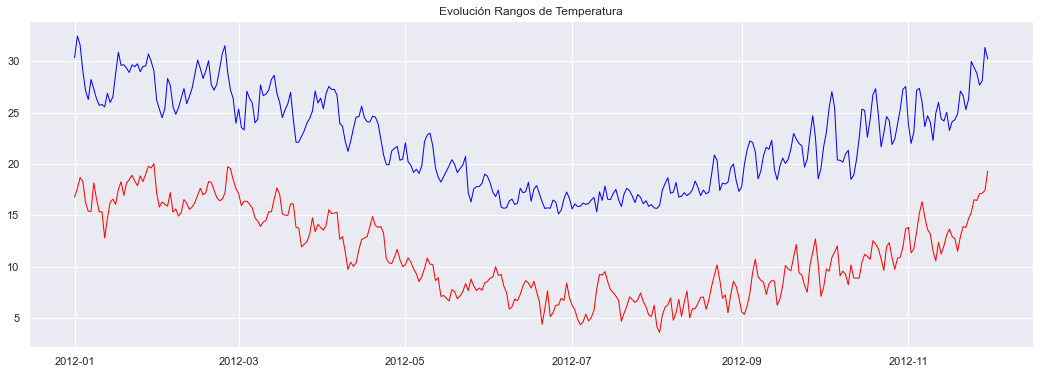

In [68]:
# Analizamos el comportamiento a lo largo de un año (2012) de las temperaturas máximas (azul) y mínimas (rojo)

mask = df['Year']==2012

plt.subplots(figsize=(18,6))

plt.plot(df.sort_values('Date').loc[mask, 'Date'].unique(), df.sort_values('Date').loc[mask, ['Date', 'MinTemp']].groupby('Date').mean(), color='red', linewidth=1, label='MinTemp')
plt.plot(df.sort_values('Date').loc[mask, 'Date'].unique(), df.sort_values('Date').loc[mask, ['Date', 'MaxTemp']].groupby('Date').mean(), color='blue', linewidth=1, label='MaxTemp')
plt.title('Evolución Rangos de Temperatura')

Se observa un comportamiento esperado en la evolución de las temperaturas debido a la estacionalidad.

Text(0.5, 1.0, 'Evolución Rainfall')

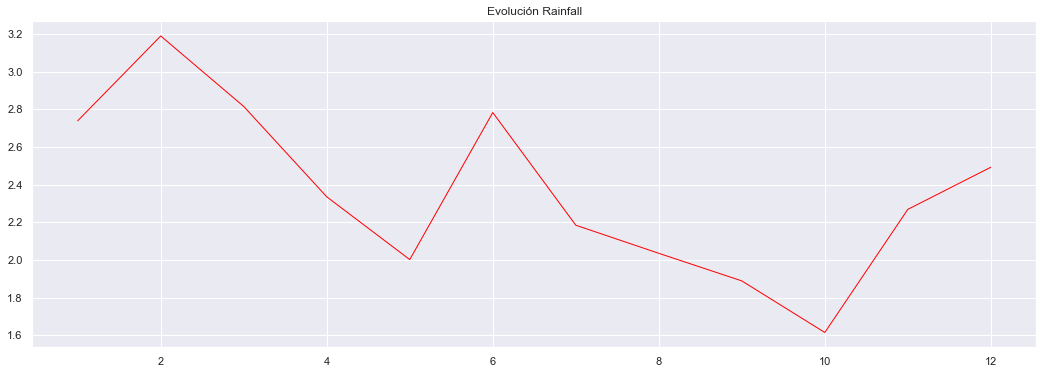

In [69]:
# Analizamos el comportamiento anual de las precipitaciones (usando la media)

mask = df['Year']==2012

plt.subplots(figsize=(18,6))

plt.plot(df['Month'].sort_values().unique(), df[['Month', 'Rainfall']].sort_values('Month').groupby('Month').mean(), color='red', linewidth=1, label='Rainfall')
plt.title('Evolución Rainfall')

Se observa un crecimiento en las precipitaciones para Junio (estacionalidad) y Febrero (posiblemente debido a lluvias de verano u algún otro efecto similar). 

A continuación, vamos a evaluar la relación geográfico-temporal de algunas variables (precipitaciones y lluvias diarias). Para ello, se utilizará un heatmap en el tiempo que relacione éstas variables. Nuevamente tomamos el año 2012 como referencia para acotar las muestras.

In [70]:
plugins.HeatMapWithTime?

El plugin de HeatMapWithTime, recibe una lista de lista de puntos, donde la lista externa tiene las mísmas dimensiones que el tiempo y la lista interna tiene la cantidad de puntos observados en ese instante de tiempo, con sus correspondientes datos (latitud, longitud y weight). Éste último parámetro se debe indicar en un rango [0, 1], por lo que escalaremos las precipitaciones. Si se observa el boxplot de precipitaciones realizado más arriba, se encuentran una gran cantidad de outliers que afectarían gravemente el escalado. Es por eso que se emplea una máscara que excluya outliers por rango intercuartílico, previo a tomar las muestras.

In [71]:
# Exclusión de outliers de precipitaciones
q1_rain = df['Rainfall'].quantile(0.25)
q3_rain = df['Rainfall'].quantile(0.75)
iqr_rain = q3_rain - q1_rain
mask_iqr = (df['Rainfall'] > (q1_rain - 1.5 * iqr_rain)) & (df['Rainfall'] < (q3_rain + 1.5 * iqr_rain))

# Máscara para indicar el año, exluir outliers y valores faltantes en las precipitaciones
mask = (df['Year']==2012) & (df['Rainfall'].isna()==False) & mask_iqr

In [72]:
# Ordenamos y agrupamos las muestras por fecha 
loc_rainfall = df.loc[mask, ['Date','Latitude', 'Longitude', 'Rainfall']].sort_values('Date').groupby('Date')

In [73]:
data_rainfall = []

In [74]:
# Para cada fecha obtenemos los puntos y los datos de precipitaciones. Éstos últimos se escalan a [0, 1]
# Se convierten en lista y se agregan a la lista externa.

for d in loc_rainfall['Date'].unique().keys():
    date_values = loc_rainfall[['Latitude', 'Longitude', 'Rainfall']].get_group(d).values
    date_values[:, 2] = date_values[:, 2]/(loc_rainfall['Rainfall'].max().max())
    data_rainfall.append(date_values.tolist())

In [75]:
# Almacenamos en un vector todas las fechas que satisfagan la máscara formateadas como requiere el plugin
date_rainfall = [x.strftime('%Y-%m-%d') for x in df.loc[mask, 'Date']]

In [76]:
# Utilizamos únicamente los valores únicos de fecha y ordenados
date_rainfall = sorted(list(set(date_rainfall)))

In [77]:
# Verificamos que las dimensiones coincidan
len(data_rainfall)==len(date_rainfall)

True

In [78]:
map_heatmap_rainfall = folium.Map(center, tiles='CartoDB Positron', zoom_start=4)

heatmap_time_plugin = plugins.HeatMapWithTime(data_rainfall, index=date_rainfall).add_to(map_heatmap_rainfall)

In [79]:
map_heatmap_rainfall

Se observan distribuciones similares de la precipitación a las del heatmap estático. Se ven pocas variaciones en el tiempo pero, cuando las hay, ocurren en simultáneo en una vecindad de ubicaciones. A continuación, vamos a analizar los días de lluvia por ubicación y su distribución en el tiempo, nuevamente para el año 2012.

In [81]:
# Análisis de días que llovieron por ubicación geográfica

mask = (df['Year']==2012) & (df['RainToday_enc']==1)

loc_rain = df.loc[mask, ['Date','Latitude', 'Longitude', 'RainToday_enc']].sort_values('Date').groupby('Date')

data_rain = []

for d in loc_rain['Date'].unique().keys():
    date_values = loc_rain[['Latitude', 'Longitude', 'RainToday_enc']].get_group(d).values
    data_rain.append(date_values.tolist())
    
date_rain = [x.strftime('%Y-%m-%d') for x in df.loc[mask, 'Date']]
date_rain = sorted(list(set(date_rain)))

In [82]:
map_heatmap_rain = folium.Map(center, tiles='CartoDB Positron', zoom_start=4)

heatmap_time_plugin = plugins.HeatMapWithTime(data_rain, 
                                              index=date_rain, 
                                              radius=10, 
                                              gradient = {0:'blue', 1:'red'}).add_to(map_heatmap_rain)

In [83]:
map_heatmap_rain

A partir del heatmap animado anterior, se sacan las siguientes conclusiones:
* La mayor concentración de lluvias se da en las zonas sureste y suroeste del país.
* Desde Enero a Junio aproximadamente, las lluvias son esporádicas y se concentran en su mayoría en la costa sureste.
* Por lo general suele llover más de una día seguido en la mísma ubicación. De aquí se desprende que RainToday potencialmente es un gran predictor de RainTomorrow.
* Si llueve en una ubicación, suele llover también en las ubicaciones aledañas. Es importante incorporar una feature que agrupe las ubicaciones por cercanía geográfica.
* Se registran bastantes lluvias aisladas en las zonas insulares y cuando ocurren, suelen ocurrir en conjunto con las ubicaciones costeras más cercanas. Sería una buena idea incorporar una feature que indique si una ubicación es insular o no. 

## Análisis Variable de Salida

Se selecciona como variable de salida, el campo de RainTomorrow que indica si lloverá o no al día siguiente. La variable es de tipo categoría, donde toma dos valores (yes o no). A continuación, se analiza la cantidad de valores faltantes en la salida y si la mísma se encuentra balanceada.

In [84]:
# Cantidad de Valores Faltantes
df['RainTomorrow'].isna().sum()

3267

In [85]:
# Porcentaje de NaNs en la salida

print("Porcentaje de NaNs: {:.2f}%".format((df['RainTomorrow'].isna().sum()/df['RainTomorrow'].shape[0])*100))

Porcentaje de NaNs: 2.25%


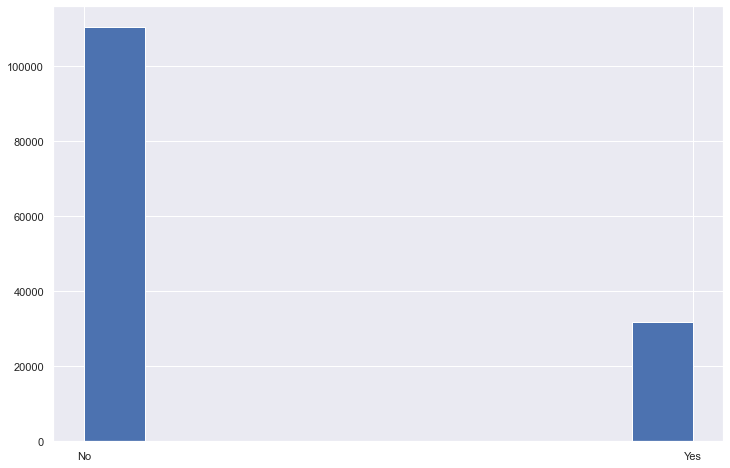

In [86]:
# Verificamos el histograma
df['RainTomorrow'].hist(figsize=(12, 8))

In [87]:
# Proporción de clases:

print("Porcentaje de Clase Yes: {:.2f}%".format(((df['RainTomorrow']=='Yes').sum()/df['RainTomorrow'].shape[0])*100))

Porcentaje de Clase Yes: 21.91%


Como se puede observar, la variable de salida está altamente desbalanceada, hay una mayor proporción de muestras sin lluvia que con lluvia (21.91%). Previo al entrenamiento del modelo, se ensayarán distintas técnicas para lidiar con el desbalance de clases.

Respecto de la codificación de la variable de salida, entendiendo que se trata de un problema de clasificación binaria, se propone utilizar una única variable que tome valores 0 y 1 para representar una u otra clase. Se usará para ello una codificación con LabelEncoder de Sci-kit Learn.

Exportamos el dataframe que ahora contiene las latitudes y longitudes:

In [88]:
df.to_csv("weather_merged.csv", index=False)